In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df1 = pd.read_csv('train.csv') # importing training data
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df1.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')

29720 Non-Hatred Tweets
2242 Hatred Tweets


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

df1['normalized_text'] = df1.tweet.apply(normalizer)

# example
# remove @user -> remover anything that is not a alphabet -> reduce to lowercasse ->split into words -> remove all words that is not in stopword.words('english') dictionary ->
# normalizer('@user i am Hey 26 bub ;]  dbv')
# i am Hey 26 bub ;] dbv
# i am Hey    bub    dbv
# i am hey    bub    dbv
# ['i', 'am', 'hey', 'bub', 'dbv']
# ['hey', 'bub', 'dbv']
# ['hey', 'bub', 'dbv']
# 'hey bub dbv'


def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets
df1['hashtag'] = df1.tweet.apply(extract_hashtag)

df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [ ]:
all_words = " ".join(df1.normalized_text)

In [ ]:
hatred_words = " ".join(df1[df1['label']==1].normalized_text)

In [ ]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_all_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [ ]:
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [ ]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())
print(df_allhashtag.head())

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471


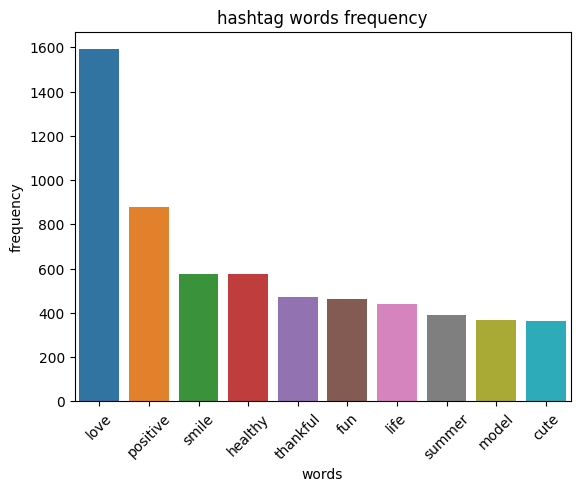

In [ ]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

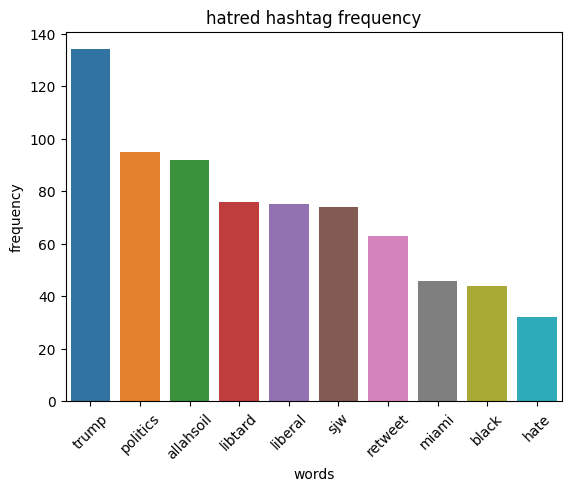

In [ ]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [ ]:
print(len(df1))
corpus = []
for i in range(0,31962):
    corpus.append(df1['normalized_text'][i])
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

31962


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values
from sklearn.decomposition import PCA

pca_30 = PCA(n_components=2, random_state=2020)
pca_30.fit(X)
X_pca_30 = pca_30.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_30, y, test_size=0.2, random_state=42)
X_train.shape

(25569, 35089)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (2,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-06-01 15:55:10.423007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 15:55:10.967740: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-01 15:55:13.155098: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-01 15:55:13.155231: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1566080   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,568,833
Trainable params: 1,568,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2)

# BERT

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [2]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
# from wordcloud import WordCloud, STOPWORDS
# from nltk import FreqDist
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression #classification model
# from sklearn.metrics import confusion_matrix, classification_report, f1_score

def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

data['normalized_text'] = data.tweet.apply(normalizer)

# example
# remove @user -> remover anything that is not a alphabet -> reduce to lowercasse ->split into words -> remove all words that is not in stopword.words('english') dictionary ->
# normalizer('@user i am Hey 26 bub ;]  dbv')
# i am Hey 26 bub ;] dbv
# i am Hey    bub    dbv
# i am hey    bub    dbv
# ['i', 'am', 'hey', 'bub', 'dbv']
# ['hey', 'bub', 'dbv']
# ['hey', 'bub', 'dbv']
# 'hey bub dbv'


def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets
data['hashtag'] = data.tweet.apply(extract_hashtag)

data.head()

[nltk_data] Downloading package wordnet to /home/coding-
[nltk_data]     blood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/coding-
[nltk_data]     blood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [4]:
all_words = " ".join(data.normalized_text)
hatred_words = " ".join(data[data['label']==1].normalized_text)

In [10]:
# !pip install tensorflow_hub
# # !pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [9]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess_model = hub.KerasLayer(preprocess_url)
text_test = data['normalized_text'].tolist()
text_preprocessed = bert_preprocess_model(text_test)

NameError: name 'hub' is not defined

In [ ]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()
df = bert_results['pooled_output']

In [24]:
df.shape
text_test

0        father dysfunctional selfish drag kid dysfunct...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwave trying wrap mantle gen...
31959       listening sad song monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: normalized_text, Length: 31962, dtype: object